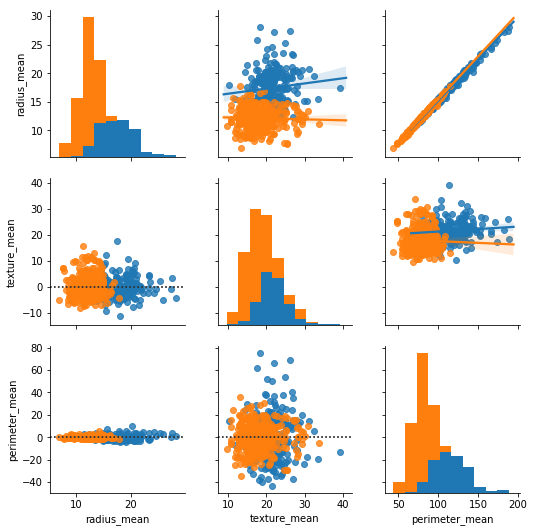

In [16]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
cancerData = pd.read_csv('data/data.csv')

# g = sns.FacetGrid(data=cancerData, col='diagnosis')
# g.map(plt.hist, 'radius_mean', bins=50)

s = sns.PairGrid(cancerData[['radius_mean','texture_mean','perimeter_mean', 'diagnosis']], hue='diagnosis')
s.map_upper(sns.regplot) 
s.map_lower(sns.residplot) 
s.map_diag(plt.hist) 
# Takeaways
# More Benign than Malignant data - therefore model accuracy will be more skewed to benign 
# Malignant - mid-size radius, larger perimeter
# Benign - smaller radius, smaller perimeter

In [24]:
cancerData = pd.read_csv('data/data.csv')
features_mean = list(cancerData.columns[2:11])

def classification_model(model, data, predictors, outcome):
    # Fit the model:
    model.fit(data[predictors], data[outcome])

    # Make predictions on training set:
    predictions = model.predict(data[predictors])

    # Print accuracy
    accuracy = accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    # Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data[outcome]):
        # Filter training data
        train_predictors = (data[predictors].iloc[train, :])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        # Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test, :], data[outcome].iloc[test]))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    # Fit the model again so that it can be referred outside the function:
    model.fit(data[predictors], data[outcome])
    
# Use all the features of the nucleus
predictor_var = ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean']
outcome_var = 'diagnosis'
model = LogisticRegression()
classification_model(model, cancerData, predictor_var, outcome_var)

Accuracy : 89.279%
Cross-Validation Score : 78.070%
Cross-Validation Score : 82.018%
Cross-Validation Score : 86.550%
Cross-Validation Score : 87.939%
Cross-Validation Score : 89.112%


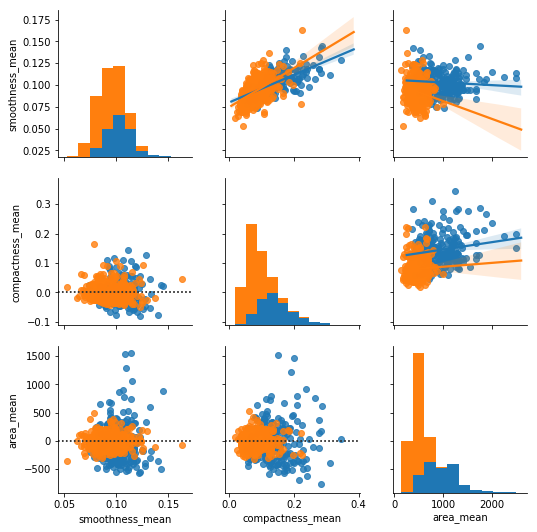

In [3]:
g = sns.PairGrid(cancerData[['smoothness_mean','compactness_mean','area_mean','diagnosis']], hue='diagnosis')
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
# Takeaways
# Malignant - less compact, greater area
# Benign - more compact, smaller area

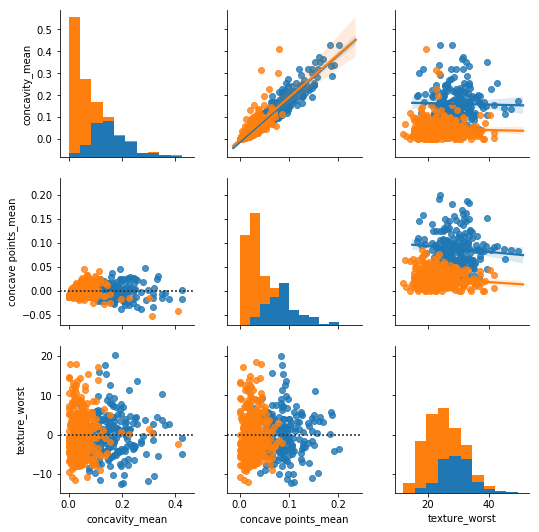

In [4]:
g = sns.PairGrid(cancerData[['concavity_mean','concave points_mean','texture_worst','diagnosis']], hue='diagnosis')
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
# Takeaways
# Malignant - greater concavity, greater # of concave_points
# Benign - smaller concavity, less concave_points

In [19]:
features_mean = cancerData.columns
list(cancerData.columns[2:11])


ValueError: could not convert string to float: 'B'

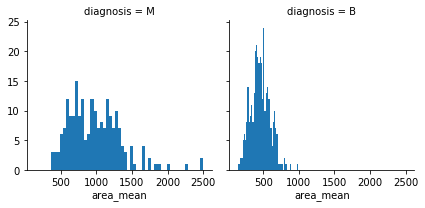

In [5]:
g = sns.FacetGrid(data=cancerData, col='diagnosis')
g.map(plt.hist, 'area_mean', bins=50)

In [15]:
# Use all the features of the nucleus
predictor_var = features_mean
outcome_var = 'diagnosis'
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model, cancerData, predictor_var, outcome_var)

#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

NameError: name 'RandomForestClassifier' is not defined

In [20]:
features_mean=list(cancerData.columns[1:11])
print(features_mean)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean']
